In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,root_mean_squared_error
import statsmodels.formula.api as sm

In [2]:
df=pd.read_excel('cleaned.xlsx')

In [3]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,0,1
1,2013,4.75,2.255493,116.919996,1,0,1
2,2017,7.25,2.287471,60.252218,0,0,1
3,2011,2.85,1.423108,54.300312,0,0,1
4,2014,4.60,1.927164,116.381220,1,0,1
...,...,...,...,...,...,...,...
291,2016,9.50,2.451005,107.449775,1,0,1
292,2015,4.00,1.774952,131.742217,0,0,1
293,2009,3.35,2.397895,151.021928,0,0,1
294,2017,11.50,2.525729,66.406442,1,0,1


In [4]:
sc=StandardScaler()
df['Present_Price']=sc.fit_transform(df[['Present_Price']])
df['Kms_Driven']=sc.fit_transform(df[['Kms_Driven']])

In [5]:
X=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=94)

In [41]:
#modeling
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Coefficients of the model:',model.coef_)
print('Intercept of the model:',model.intercept_)

In [35]:
train_mse=mean_squared_error(y_train,model.predict(X_train))
train_rmse=root_mean_squared_error(y_train,model.predict(X_train))
train_r2=r2_score(y_train,model.predict(X_train))
cross=cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean()

train mse : 6.34467686966719
train rmse: 2.5188642023076966


In [39]:
print('train mse :',train_mse)
print('train rmse:',train_rmse)
print("Train_r2",train_r2)
print('Cross validation score is:',cross)

train mse : 6.34467686966719
train rmse: 2.5188642023076966
Train_r2 0.7436077575000494
Cross validation score is: 0.6867722528346623


In [37]:
#Prediction
y_test_pred=model.predict(X_test)

In [25]:
test_mse=mean_squared_error(y_test,y_test_pred)
test_rmse=root_mean_squared_error(y_test,y_test_pred)
test_r2=r2_score(y_test,y_test_pred)

In [29]:
print('Test mse:',test_mse)
print('test rmse:',test_rmse)
print('test_r2:',test_r2)

Test mse: 5.609203456388404
test rmse: 2.3683757000080043
test_r2: 0.7748371456974888


In [11]:
residuals=y_test-y_test_pred

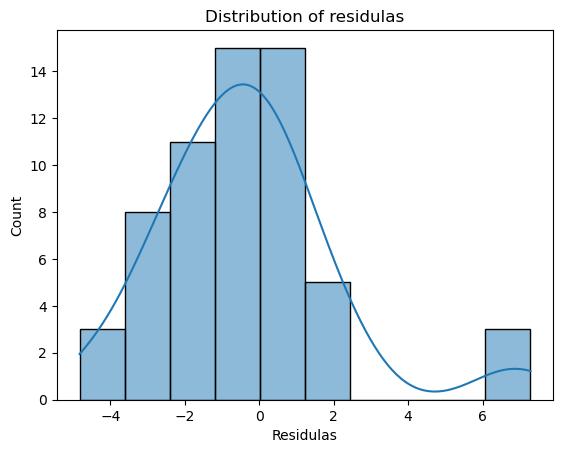

In [12]:
sns.histplot(residuals,kde=True)
plt.title('Distribution of residulas')
plt.xlabel('Residulas')
plt.show()

- Here the variance of errors is not constant

In [13]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           2.35e-47
Time:                        14:38:57   Log-Likelihood:                -601.98
No. Observations:                 236   AIC:                             1212.
Df Residuals:                     232   BIC:                             1226.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5247      0.204     22.223      0.0